In [1]:
from PIL import Image
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pickle
import sat_utils as utils

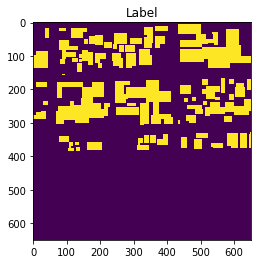

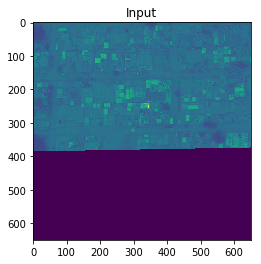

In [2]:
target = utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_target.tif')
input = utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_input.tif')

plt.imshow(target[0,:,:])
plt.title('Label');
plt.show()

plt.imshow(input[4,:,:])
plt.title('Input');
plt.show()

In [ ]:
target_b = target.astype(np.bool)
target_b[:,:,0]

In [ ]:
target_b[:,:,0] ^ target_b[:,:,1]

#### Crop and Display

Original: (3, 650, 650)
Cropped: (3, 76, 76)
Max target: 255.0
Min target: 0.0


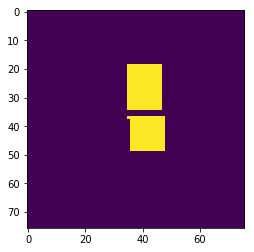

Original: (8, 650, 650)
Cropped: (3, 76, 76)
MovedAxis: (76, 76, 3)


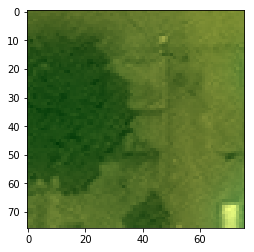

In [5]:
crop_target = utils.crop_img(target,0,0,76,76)
print('Original:',target.shape)
print('Cropped:',crop_target.shape)
print('Max target:', np.max(target))
print('Min target:', np.min(target))
plt.imshow(crop_target[0,:,:])
plt.show()

crop_input = utils.crop_img(input,0,0,76,76)
crop_input = utils.get_rgb(crop_input)
print('Original:',input.shape)
print('Cropped:',crop_input.shape)
crop_input = np.moveaxis(crop_input, 0, 2)
print('MovedAxis:',crop_input.shape)
rgb_norm = utils.img_minmax_norm(crop_input[:,:,0:3])
plt.imshow( rgb_norm )
plt.show()

img_1_input.png


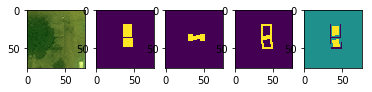

img_2_input.png


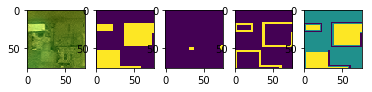

img_3_input.png


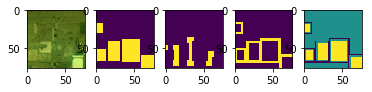

img_4_input.png


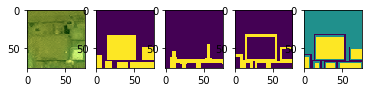

img_5_input.png


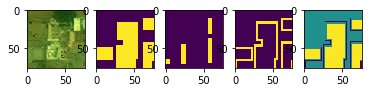

img_6_input.png


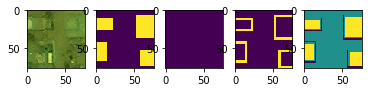

img_7_input.png


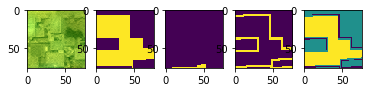

img_8_input.png


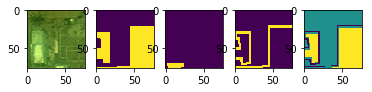

img_9_input.png


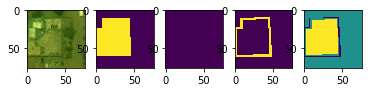

img_10_input.png


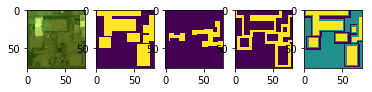

img_11_input.png


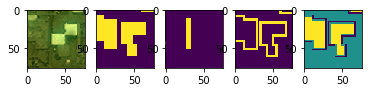

img_12_input.png


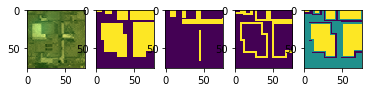

img_13_input.png


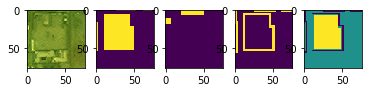

img_14_input.png


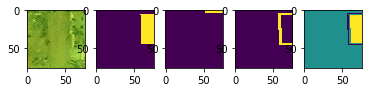

img_15_input.png


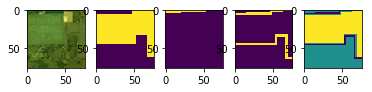

img_16_input.png


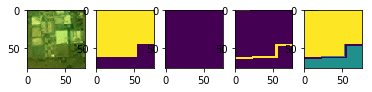

img_17_input.png


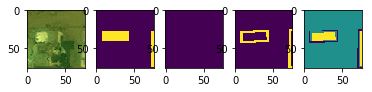

img_18_input.png


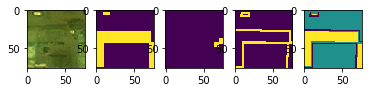

img_19_input.png


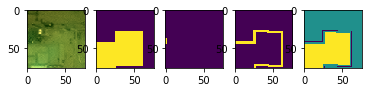

img_20_input.png


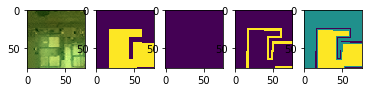

img_21_input.png


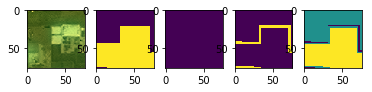

img_22_input.png


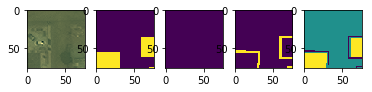

img_23_input.png


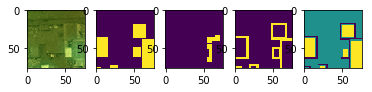

img_24_input.png


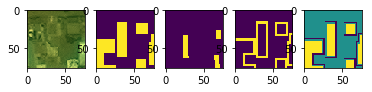

img_25_input.png


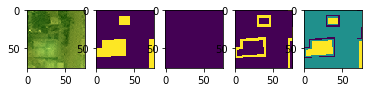

img_26_input.png


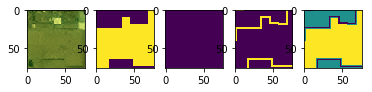

img_27_input.png


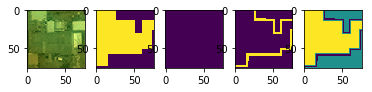

img_28_input.png


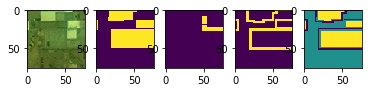

img_29_input.png


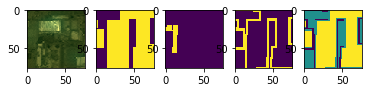

img_30_input.png


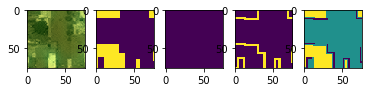

img_31_input.png


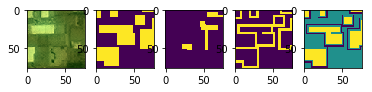

img_32_input.png


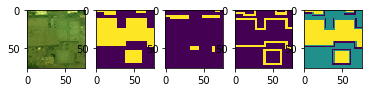

img_33_input.png


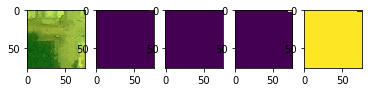

img_34_input.png


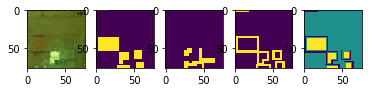

img_35_input.png


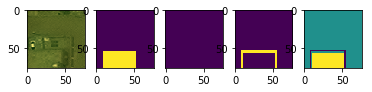

img_36_input.png


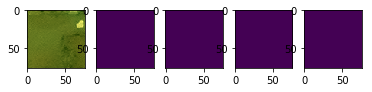

img_37_input.png


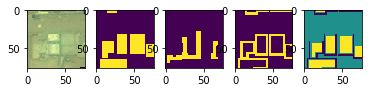

img_38_input.png


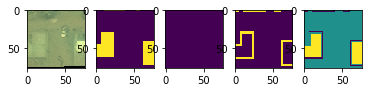

img_39_input.png


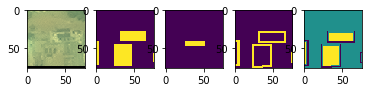

In [3]:
dict_input, dict_output = utils.crop_blocks(input, target, display=True, earlyStop=39)

### Save images to Pickle

In [ ]:
with open('input.pickle', 'wb') as handle:
    pickle.dump(dict_input, handle)

with open('label.pickle', 'wb') as handle:
    pickle.dump(dict_output, handle)
    

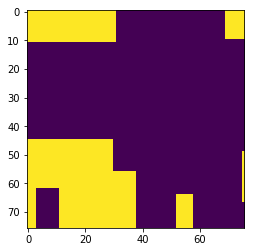

In [8]:
plt.imshow(dict_output[29][0,:,:])

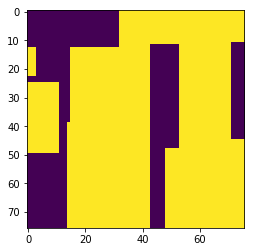

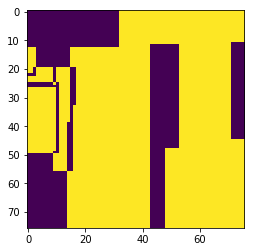

In [23]:
num = 28
plt.imshow(dict_output[num][0,:,:])
plt.show()
plt.imshow(dict_output[num][0,:,:].astype(np.bool) ^ dict_output[num][1,:,:].astype(np.bool))
plt.show()